<a href="https://colab.research.google.com/github/cuteGW/project_Lovely-G.4_none/blob/main/%EC%BA%90%EA%B8%80_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1%5B%EA%B7%9C%EC%99%84%5D_%EC%9D%B4%EC%83%81%EC%B9%98_%EC%88%98%EC%A0%95%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # 모든 열을 출력한다.

# 기본 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import seaborn as sns
from matplotlib import rc

# 기본 한글 폰트로 설정
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'C:/Windows/Fonts/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
plt.rcParams['font.family'] = 'NanumGothic'

# 음수 부호까지 제대로 표시되도록 설정 추가
plt.rcParams['axes.unicode_minus'] = False

# 경고 메시지 무시
import random
import warnings
warnings.filterwarnings("ignore")

train_df = pd.read_csv('/content/drive/MyDrive/캐글 주택가격 예측/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/캐글 주택가격 예측/test.csv')
sample_submission_df = pd.read_csv('/content/drive/MyDrive/캐글 주택가격 예측/sample_submission.csv')

print(train_df.shape)
print(test_df.shape)

Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
(1460, 81)
(1459, 80)


## **결측치**

In [3]:
# 결측치가 과하게 많은 행은 제거!
train_df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test_df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [4]:
# 수치형 변수 결측값 중앙값으로 대체!
train_df['LotFrontage']=train_df['LotFrontage'].fillna(train_df['LotFrontage'].median())
train_df['MasVnrArea']=train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median())
train_df['GarageYrBlt']=train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median())

# 문자형 변수 결측값 최빈값으로 대체!
train_df['FireplaceQu']=train_df['FireplaceQu'].fillna(train_df['FireplaceQu'].mode()[0])
train_df['GarageCond']=train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0])
train_df['GarageType']=train_df['GarageType'].fillna(train_df['GarageType'].mode()[0])
train_df['GarageFinish']=train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0])
train_df['GarageQual']=train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0])
train_df['BsmtFinType2']=train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0])
train_df['BsmtExposure']=train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0])
train_df['BsmtQual']=train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0])
train_df['BsmtCond']=train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0])
train_df['BsmtFinType1']=train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0])
train_df['MasVnrType']=train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])
train_df['Electrical']=train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

In [5]:
# 수치형 변수 결측값 중앙값으로 대체!
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].median())
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].median())
test_df['GarageYrBlt']=test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].median())
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].median())
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].median())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].median())
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].median())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].median())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].median())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].median())
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].median())

# 문자형 변수 결측값 최빈값으로 대체!
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MSZoning']=test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

# **이상치**

## **train**

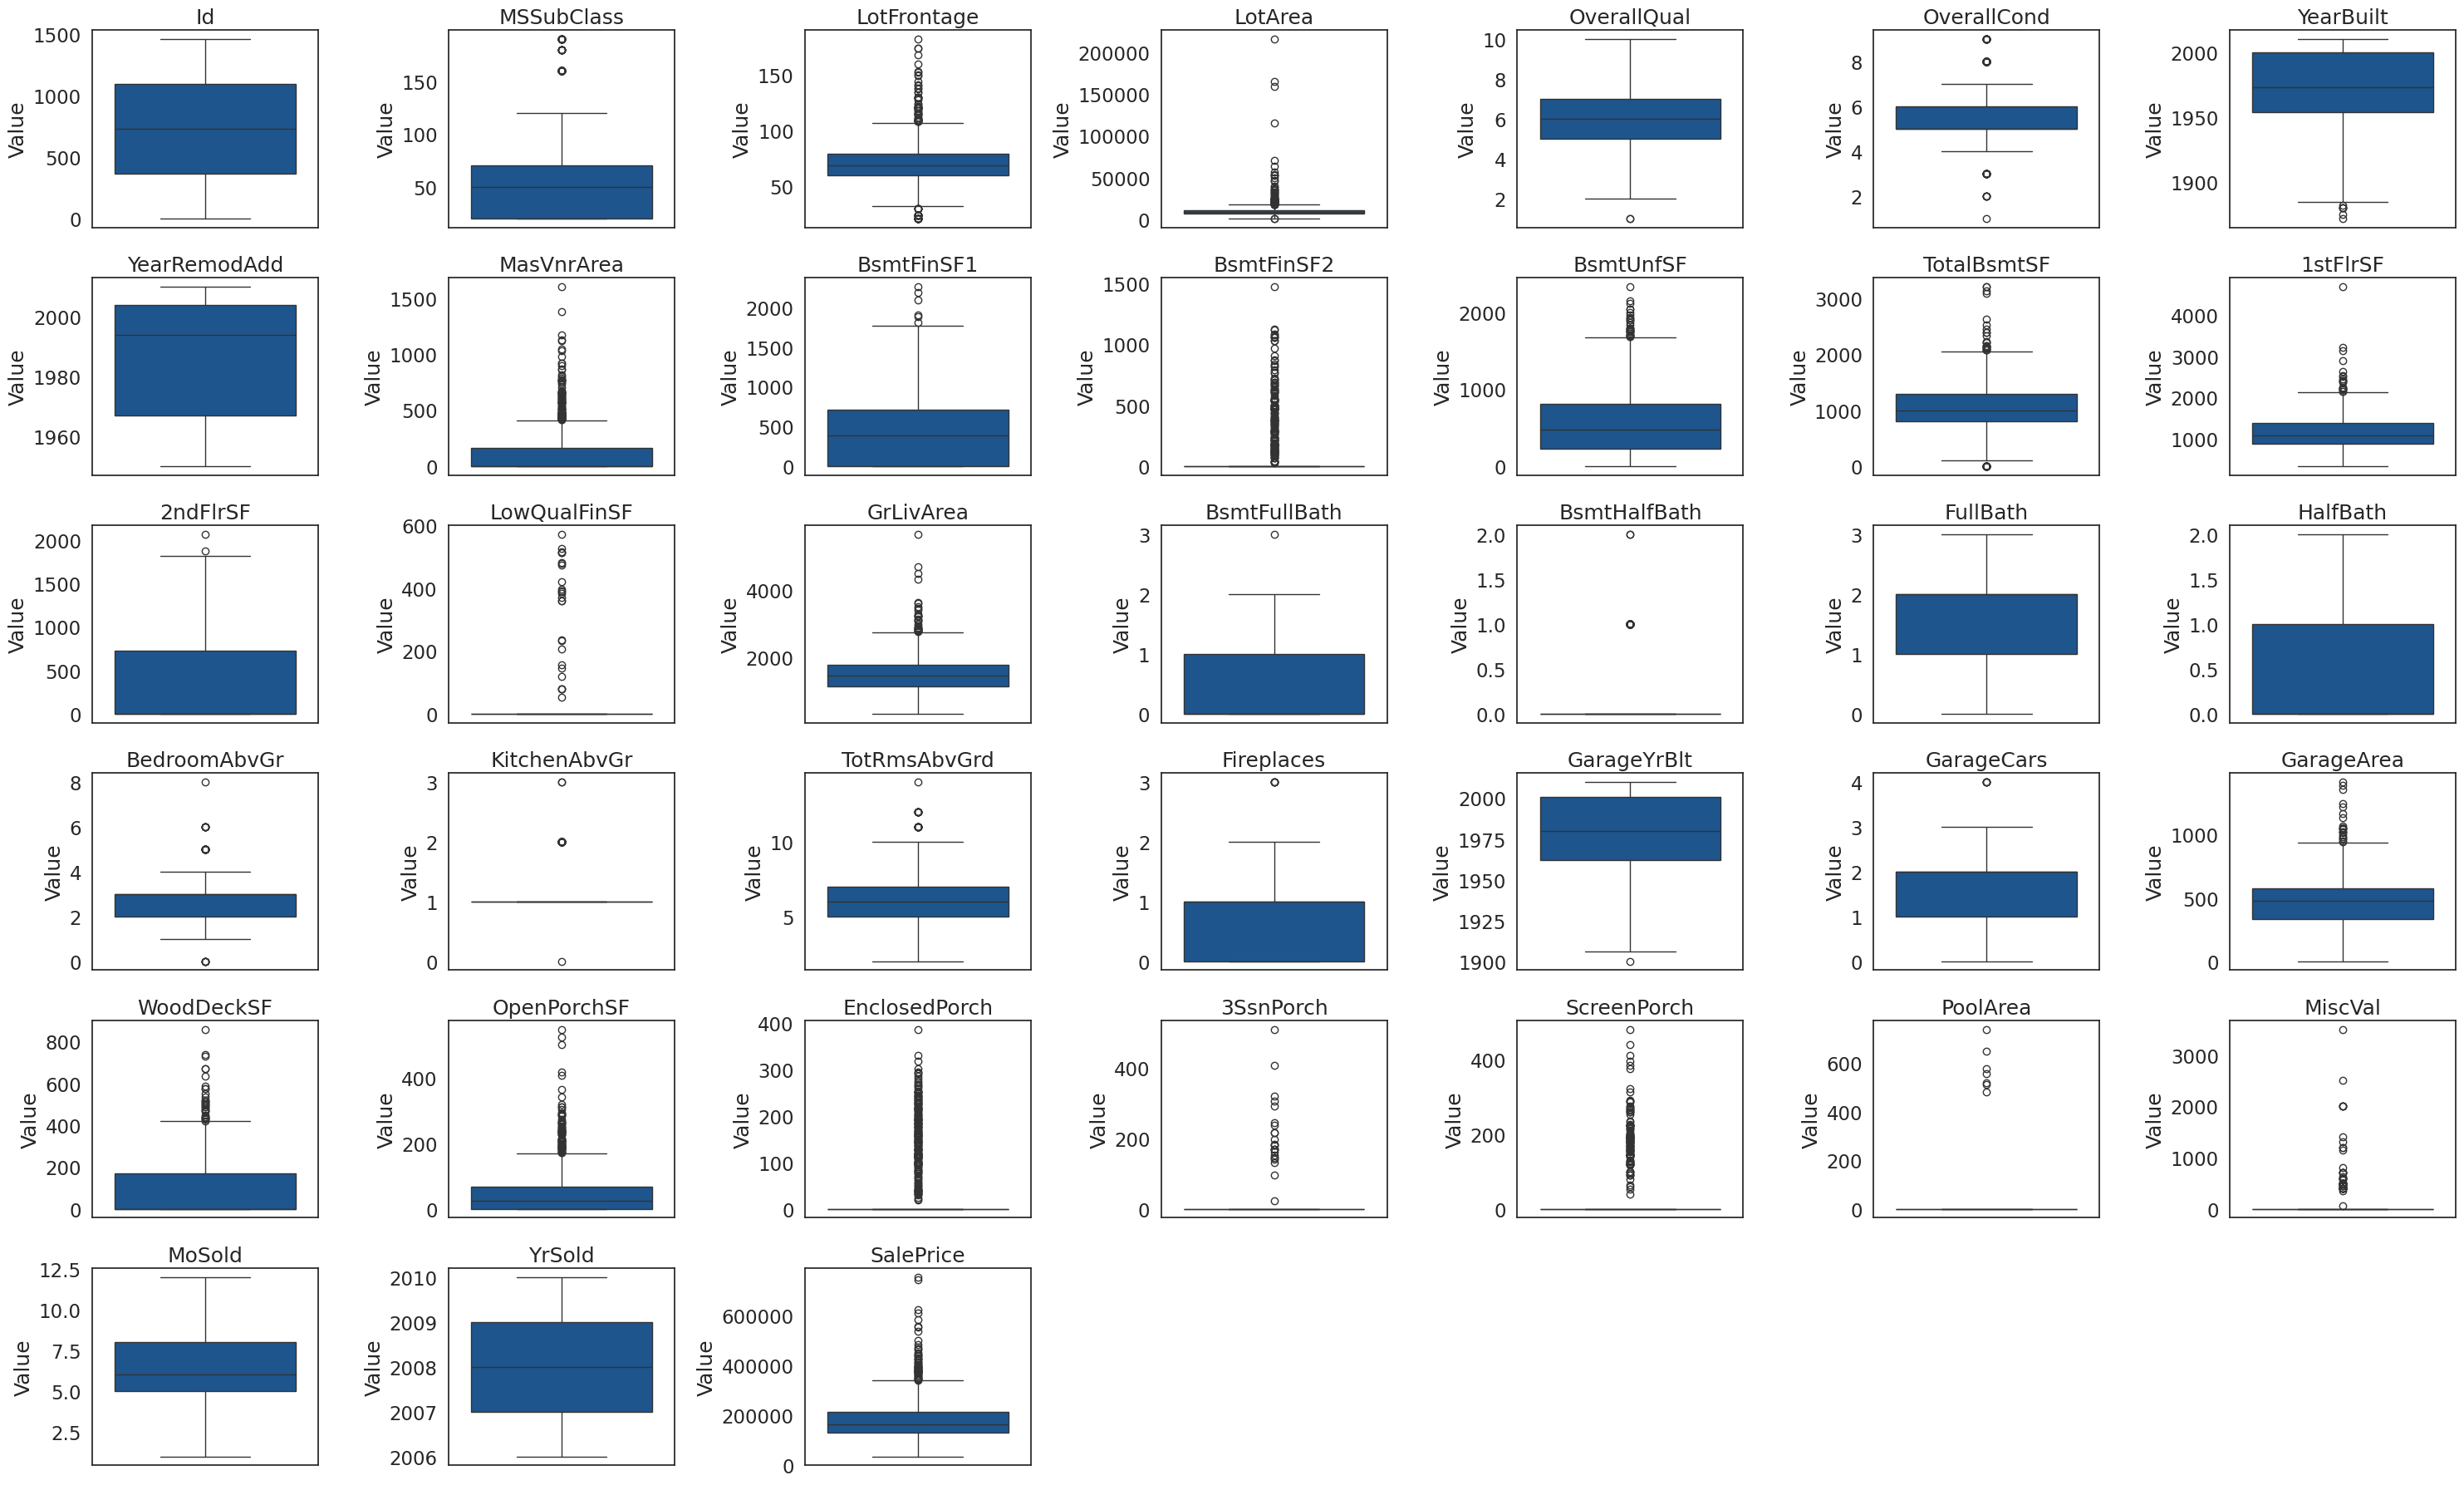

In [ ]:
plt.figure(figsize=(30, 30))  # 전체 그림의 크기 설정

for i, column in enumerate(train_df.select_dtypes(include='number').columns, 1):  # 숫자형 변수만을 선택
    plt.subplot(10, 7, i)  # 1행 3열의 subplot에서 i번째 위치에 그래프를 그림
    sns.boxplot(data=train_df[column])
    plt.title(f'{column}')
    plt.ylabel('Value')

plt.tight_layout()  # 그래프 간격을 조정하여 겹치지 않게 함
plt.show()

너무 튀는 값들만 처리!
-> LotFrontage(>=300) -> 중앙값 ,BsmtFinSF1(>=5000) -> 중앙값, TotalBsmtSF(>=5000) -> 중앙값, EnclosedPorch(>=500) -> 중앙값, MiscVal(>8000) -> 중앙값

LotArea 같은 경우는 당초에 이상치로 분류된 값들이 많은데다가 혼자 튀는 행을 확인해보니 주거 구역이 RL(인구밀도가 낮은 주거지역)이어서 부지 크기가 클 수 있겠다 싶어서 이상치 처리 안함

1stFlrSF 는 애매하긴 한데 다른 값들과의 격차가 그렇게 큰 편도 아닌 것 같고 1층이 많이 넓을 수도 있으니까 우선 남겨놓음

이상치 처리 안 한 다른 변수들은 이상치가 원채 많은데 이상치 간의 격차가 크지 않으면 혼자 튄다고 보기 애매해서 제거 안 함

In [6]:
columns_to_replace = ['LotFrontage', 'BsmtFinSF1', 'TotalBsmtSF', 'EnclosedPorch', 'MiscVal']  # 대체하려는 변수들의 리스트
values_to_replace = [300, 5000, 5000, 500, 8000]  # 대체하려는 값들의 리스트

for column, value in zip(columns_to_replace, values_to_replace):
    median_value = train_df.loc[train_df[column] < value, column].median()  # 대체할 값(value)이 아닌 값들의 중앙값 계산
    train_df.loc[train_df[column] > value, column] = median_value  # 대체할 값(value)을 중앙값으로 대체

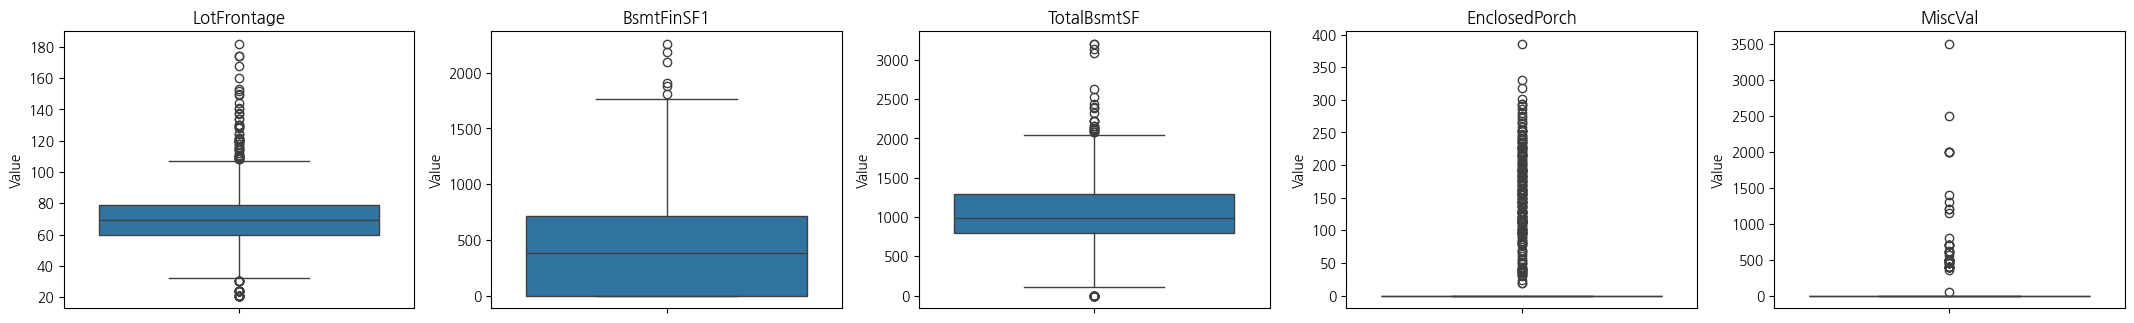

In [ ]:
plt.figure(figsize=(30, 30))  # 전체 그림의 크기 설정
selected_df = train_df[columns_to_replace]
for i, column in enumerate(selected_df.columns, 1):  # 숫자형 변수만을 선택
    plt.subplot(10, 7, i)  # 1행 3열의 subplot에서 i번째 위치에 그래프를 그림
    sns.boxplot(data=train_df[column])
    plt.title(f'{column}')
    plt.ylabel('Value')

plt.tight_layout()  # 그래프 간격을 조정하여 겹치지 않게 함
plt.show()

## **test**

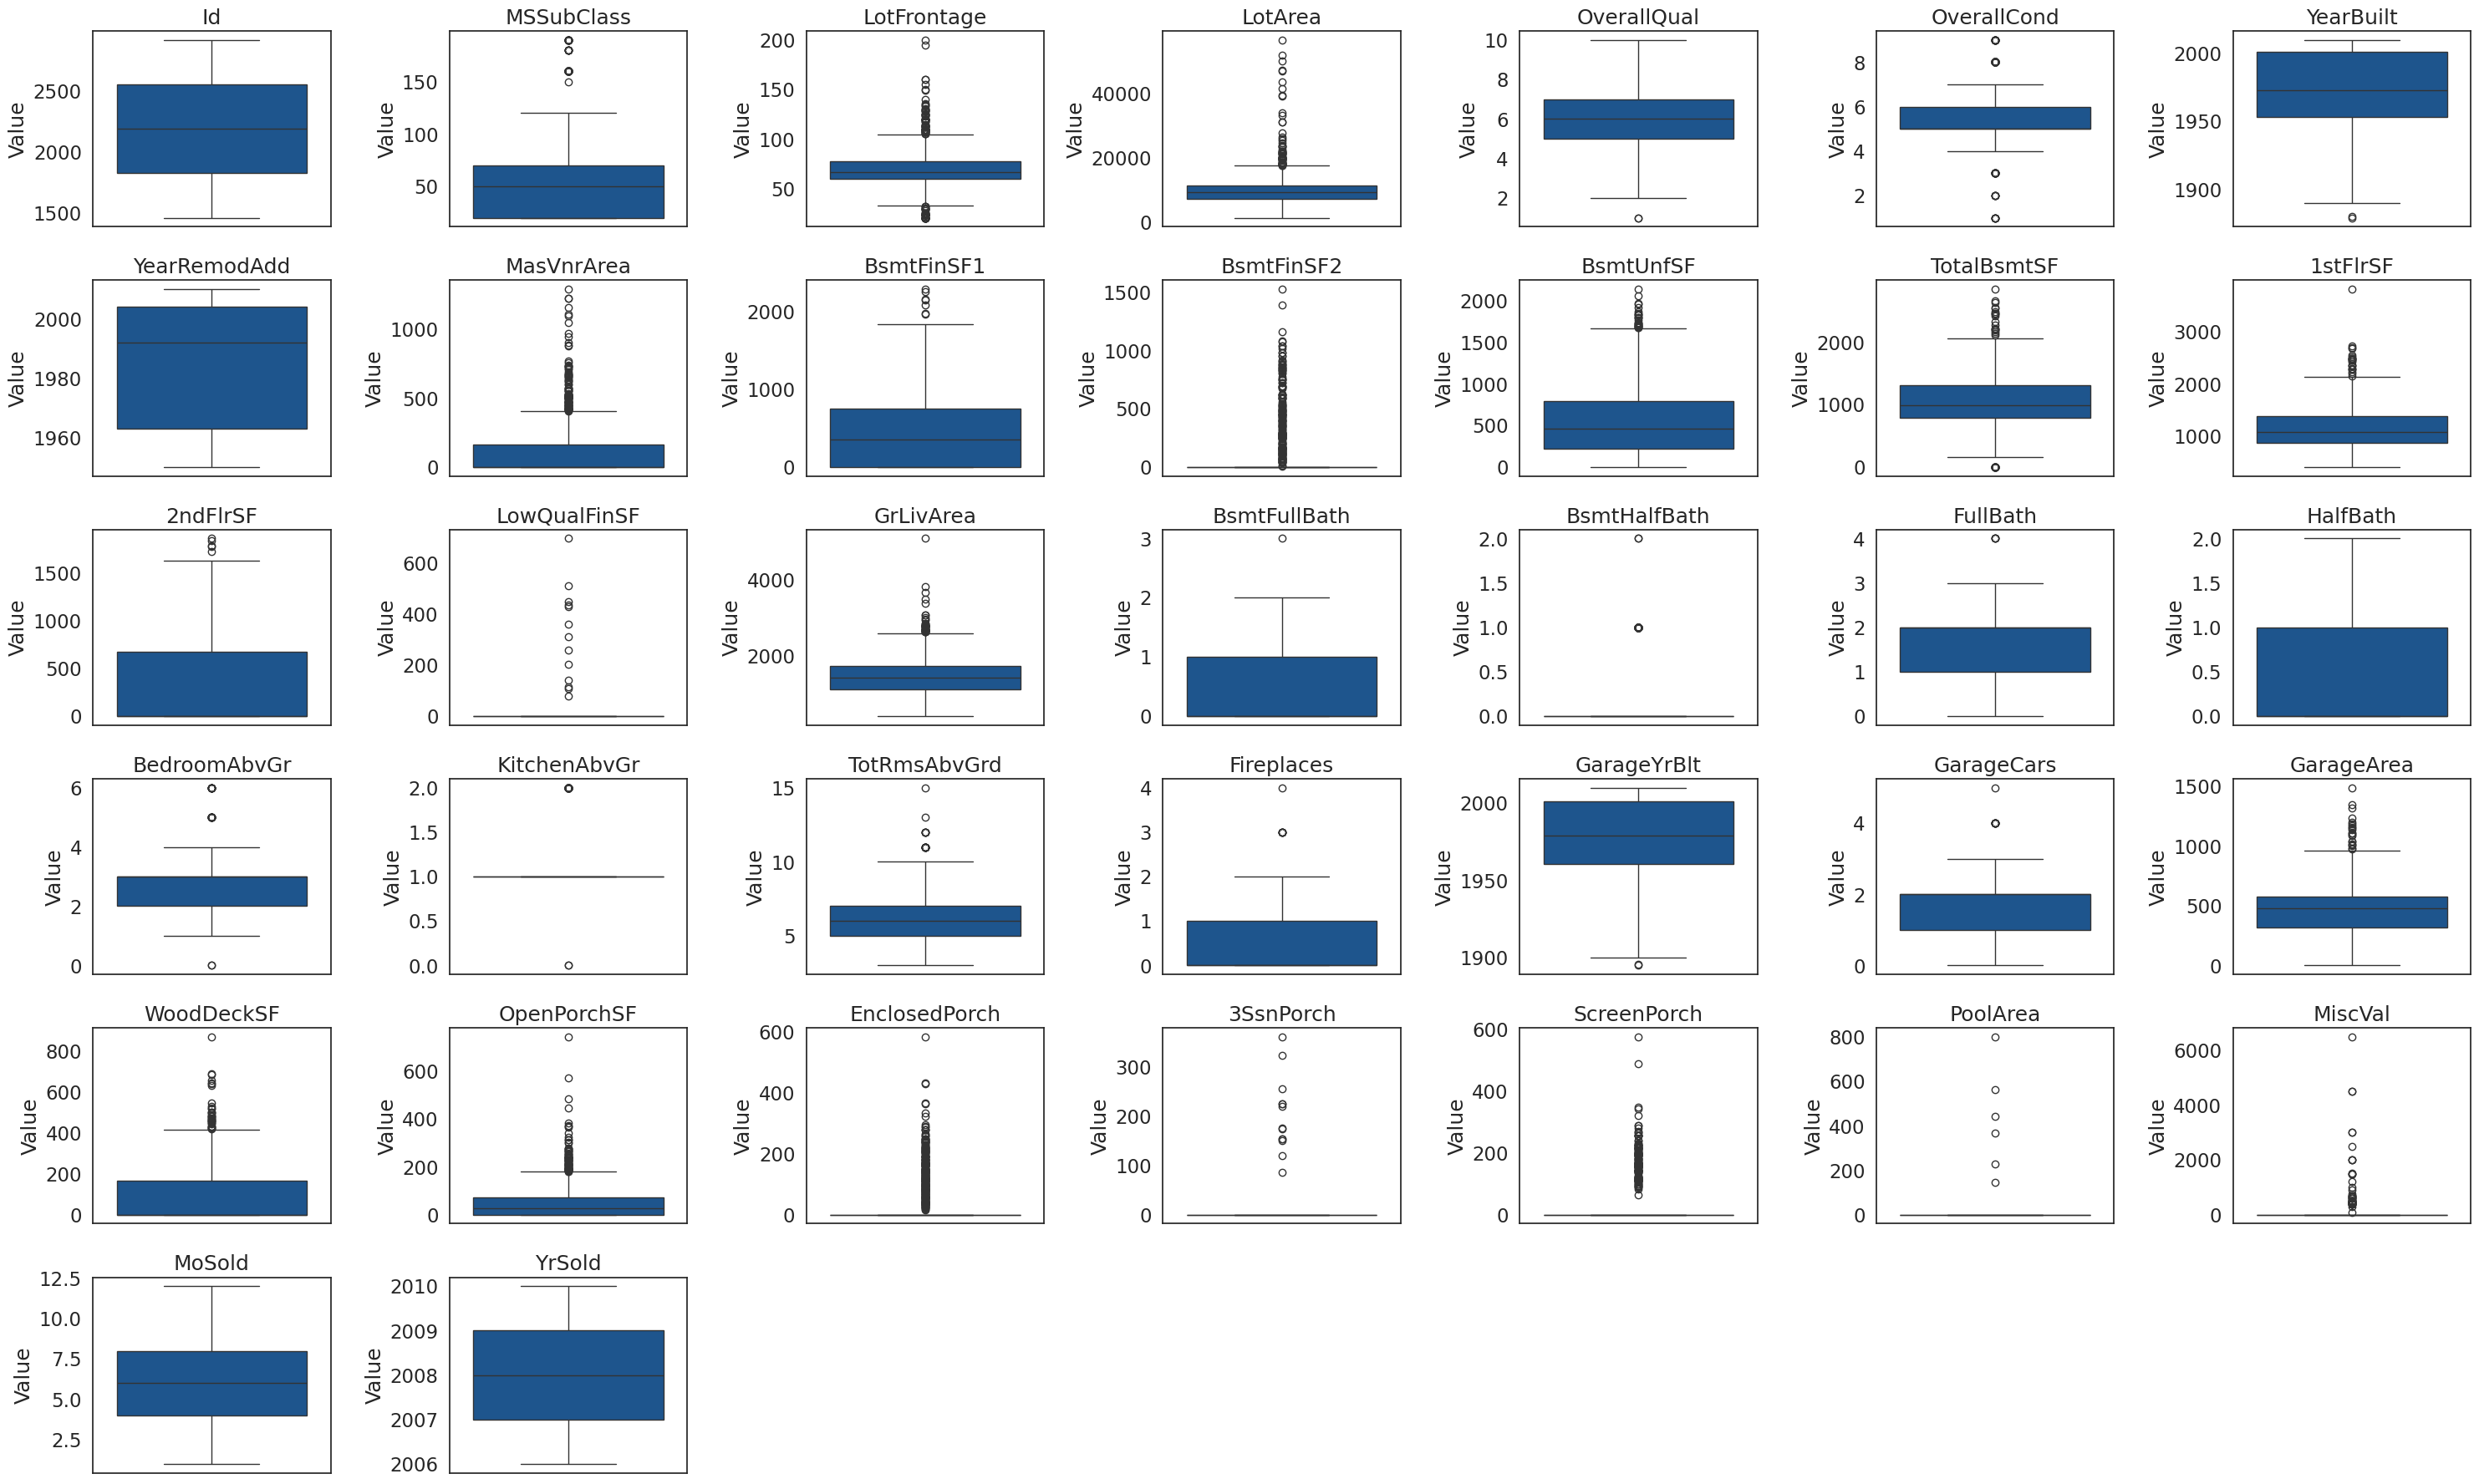

In [ ]:
plt.figure(figsize=(30, 30))  # 전체 그림의 크기 설정

for i, column in enumerate(test_df.select_dtypes(include='number').columns, 1):  # 숫자형 변수만을 선택
    plt.subplot(10, 7, i)  # 1행 3열의 subplot에서 i번째 위치에 그래프를 그림
    sns.boxplot(data=test_df[column])
    plt.title(f'{column}')
    plt.ylabel('Value')

plt.tight_layout()  # 그래프 간격을 조정하여 겹치지 않게 함
plt.show()

BsmtFinSF1(>=3500), TotalBsmtSF(>4000), WoodDeckSF(>1200), EnclosedPorch(>800), MiscVal(>10000), 1stFlrSF(>4000), LowQualFinSF(>1000) -> 중앙값, GarageYrBlt(>2150) -> k-최근접 이웃

In [7]:
columns2_to_replace = ['BsmtFinSF1', 'TotalBsmtSF', 'WoodDeckSF', 'EnclosedPorch', 'MiscVal', '1stFlrSF', 'LowQualFinSF', 'GarageYrBlt']  # 대체하려는 변수들의 리스트
values2_to_replace = [3500,4000,1200,800,10000,4000,1000,2150]  # 대체하려는 값들의 리스트

for column, value in zip(columns2_to_replace, values2_to_replace):
    median_value = test_df.loc[test_df[column] < value, column].median()  # 대체할 값(value)이 아닌 값들의 중앙값 계산
    test_df.loc[test_df[column] > value, column] = median_value  # 대체할 값(value)을 중앙값으로 대체

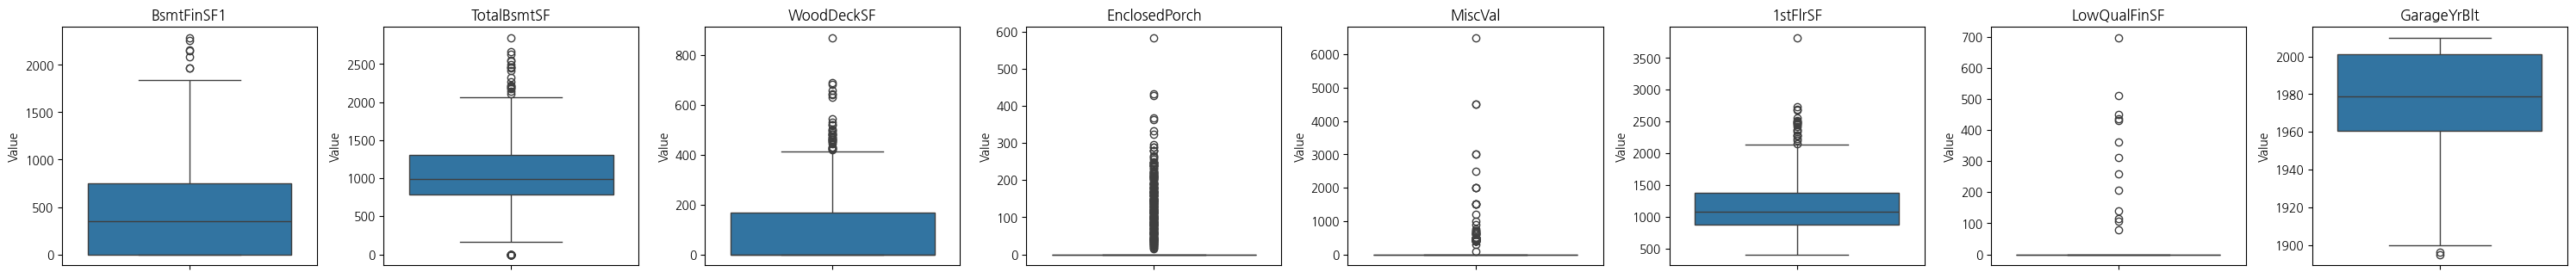

In [ ]:
plt.figure(figsize=(30, 30))  # 전체 그림의 크기 설정
selected_df = test_df[columns_to_replace]
for i, column in enumerate(selected_df.columns, 1):  # 숫자형 변수만을 선택
    plt.subplot(10, 8, i)  # 1행 3열의 subplot에서 i번째 위치에 그래프를 그림
    sns.boxplot(data=test_df[column])
    plt.title(f'{column}')
    plt.ylabel('Value')

plt.tight_layout()  # 그래프 간격을 조정하여 겹치지 않게 함
plt.show()

## **PCA 를 통한 이상치 추가 제거**

In [9]:
house_df = pd.concat([train_df,test_df],ignore_index = True, sort = False)

In [10]:
tr_idx = house_df['SalePrice'].notnull()

In [11]:
from sklearn.decomposition import PCA

In [12]:
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original house_df
    )
    return pca, X_pca, loadings

In [13]:
def outlier_iqr(data):
    q1,q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    lower = q1-(iqr*2)
    upper = q3+(iqr*2)
    return np.where((data>upper)|(data<lower))

In [14]:
# 양의 선형관계를 보이는 칼럼들을 추려서 이상치 제거!
features = ["GarageArea","OverallQual","TotalBsmtSF","GrLivArea"]

house_copy = house_df[tr_idx].copy()
y_copy = house_copy.pop("SalePrice")
X_copy = house_copy.loc[:, features]

X_copy.isnull().sum()
pca, X_pca, loadings = apply_pca(X_copy)

In [15]:
import plotly.express as px
fig = px.histogram(X_pca[['PC1','PC2']].melt(), color="variable",
                   marginal="box",
                   barmode ="overlay",
                   histnorm ='density'
                  )
fig.update_layout(
    title_font_color="white",
    legend_title_font_color="yellow",
    title={
        'text': "PCA Histogram",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)

In [16]:
pc1_outlier_idx = list(outlier_iqr(X_pca['PC1'])[0])
component = "PC1"

pc1_idx = X_pca[component].sort_values(ascending=False).index
df_temp_pc1 = house_df.loc[pc1_idx, ["SalePrice", "Neighborhood", "SaleCondition"] + features]

def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

df_temp_pc1.iloc[pc1_outlier_idx,:].style.set_properties(**{'background-color': 'Grey',
                            'color': 'white',
                            'border-color': 'darkblack'})

,SalePrice,Neighborhood,SaleCondition,GarageArea,OverallQual,TotalBsmtSF,GrLivArea
1346,262500.000000,NWAmes,Normal,508.000000,7,1568.000000,2156
686,227875.000000,Somerst,Partial,578.000000,7,874.000000,1761
536,188000.000000,CollgCr,Normal,527.000000,7,880.000000,1724
989,197000.000000,Somerst,Partial,614.000000,7,770.000000,1576
936,184900.000000,SawyerW,Normal,555.000000,7,1176.000000,1200
1,181500.000000,Veenker,Normal,460.000000,6,1262.000000,1262
164,152000.000000,OldTown,Normal,216.000000,6,1149.000000,1616
1295,138500.000000,NAmes,Normal,288.000000,5,1052.000000,1052
1005,149900.000000,CollgCr,Normal,328.000000,5,985.000000,985
837,100000.000000,BrDale,Normal,264.000000,6,483.000000,987


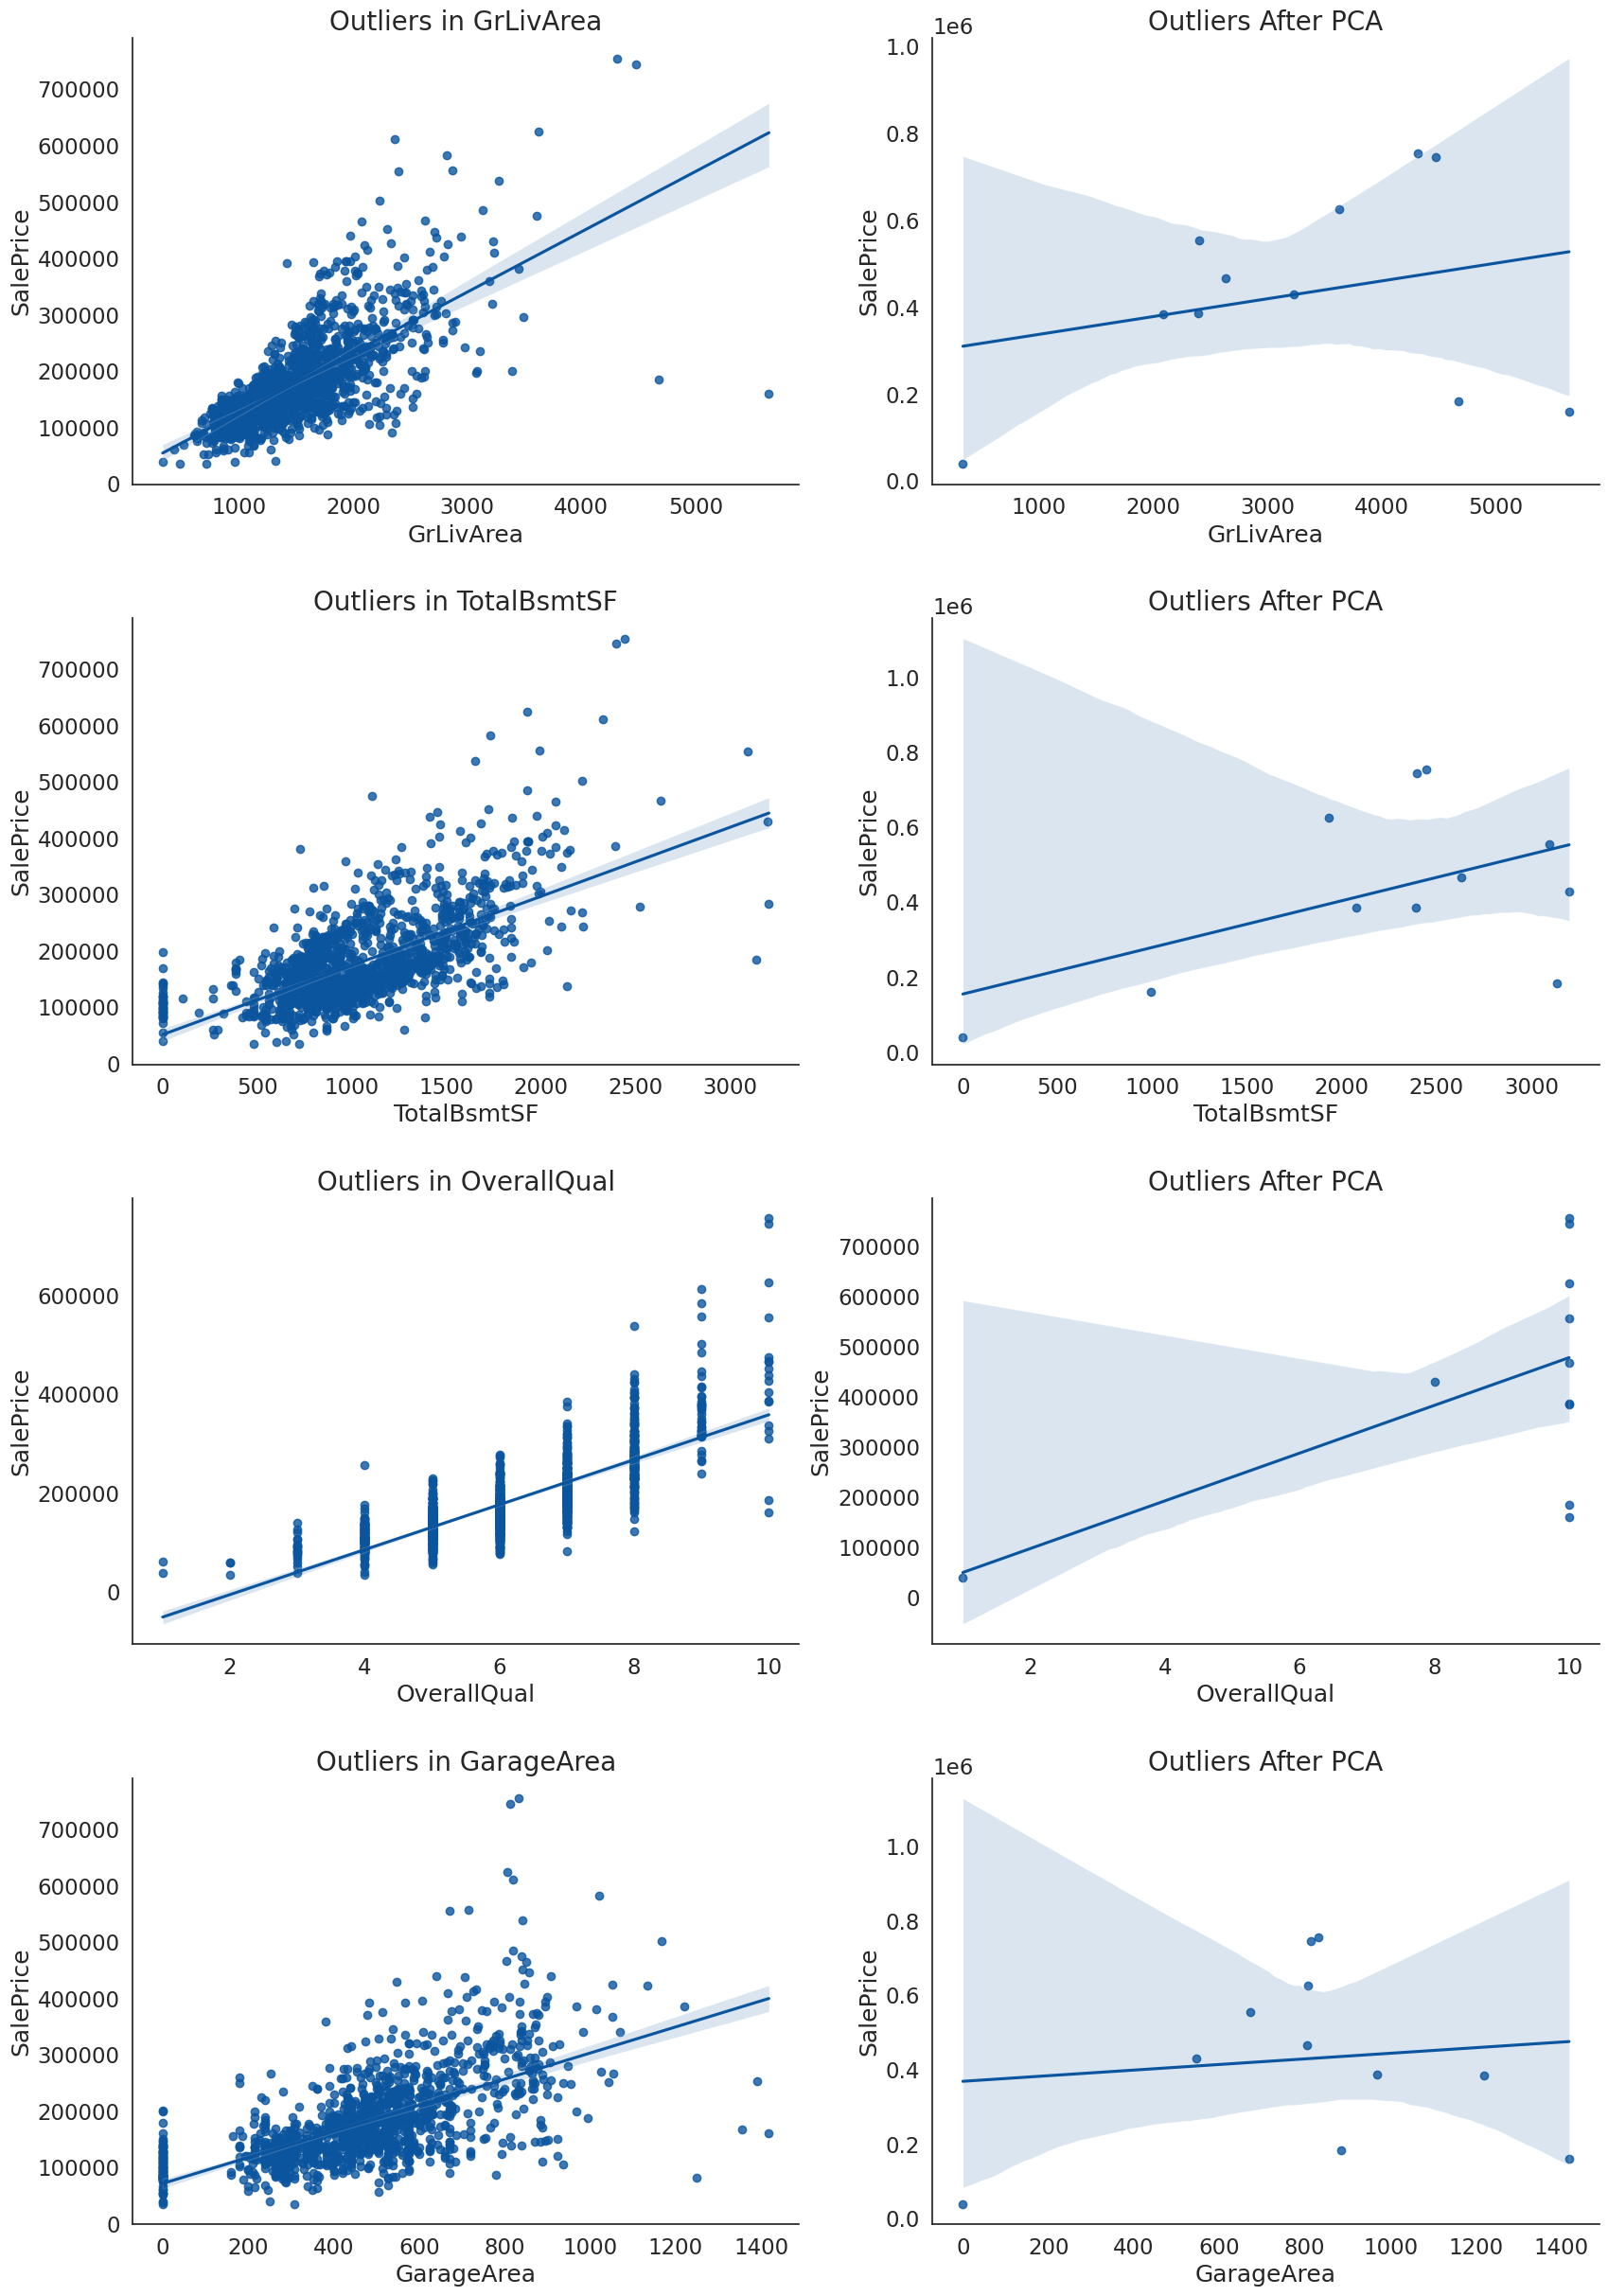

In [17]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("Blues_r")
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=0.3)
plt.subplot(4,2,1)
ax1 = sns.regplot(data=house_df, x='GrLivArea',y='SalePrice')
ax1.set_title('Outliers in GrLivArea',fontsize=20)
plt.subplot(4,2,2)
ax2 = sns.regplot(data=house_df.iloc[pc1_outlier_idx,:], x='GrLivArea',y='SalePrice')
ax2.set_title('Outliers After PCA',fontsize=20)
plt.subplot(4,2,3)
ax3 = sns.regplot(data=house_df, x='TotalBsmtSF',y='SalePrice')
ax3.set_title('Outliers in TotalBsmtSF',fontsize=20)
plt.subplot(4,2,4)
ax4 = sns.regplot(data=house_df.iloc[pc1_outlier_idx,:], x='TotalBsmtSF',y='SalePrice')
ax4.set_title('Outliers After PCA',fontsize=20)
plt.subplot(4,2,5)
ax5 = sns.regplot(data=house_df, x='OverallQual',y='SalePrice')
ax5.set_title('Outliers in OverallQual',fontsize=20)
plt.subplot(4,2,6)
ax6 = sns.regplot(data=house_df.iloc[pc1_outlier_idx,:], x='OverallQual',y='SalePrice')
ax6.set_title('Outliers After PCA',fontsize=20)
plt.subplot(4,2,7)
ax7 = sns.regplot(data=house_df, x='GarageArea',y='SalePrice')
ax7.set_title('Outliers in GarageArea',fontsize=20)
plt.subplot(4,2,8)
ax8 = sns.regplot(data=house_df.iloc[pc1_outlier_idx,:], x='GarageArea',y='SalePrice')
ax8.set_title('Outliers After PCA',fontsize=20)
sns.despine()

In [18]:
pc2_outlier_idx = list(outlier_iqr(X_pca['PC2'])[0])
component = "PC2"

pc2_idx = X_pca[component].sort_values(ascending=False).index
df_temp_pc2 = house_df.loc[pc2_idx, ["SalePrice", "Neighborhood", "SaleCondition"] + features]

def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

df_temp_pc2.iloc[pc2_outlier_idx,:].style.set_properties(**{'background-color': 'Grey',
                            'color': 'white',
                            'border-color': 'darkblack'})

,SalePrice,Neighborhood,SaleCondition,GarageArea,OverallQual,TotalBsmtSF,GrLivArea
1411,140000.000000,NAmes,Normal,271.000000,6,856.000000,1668
276,201000.000000,Mitchel,Normal,573.000000,7,1560.000000,1560


In [19]:
house_df.drop(pc1_outlier_idx,axis=0,inplace=True,errors='ignore')
house_df.drop(pc2_outlier_idx,axis=0,inplace=True,errors='ignore')

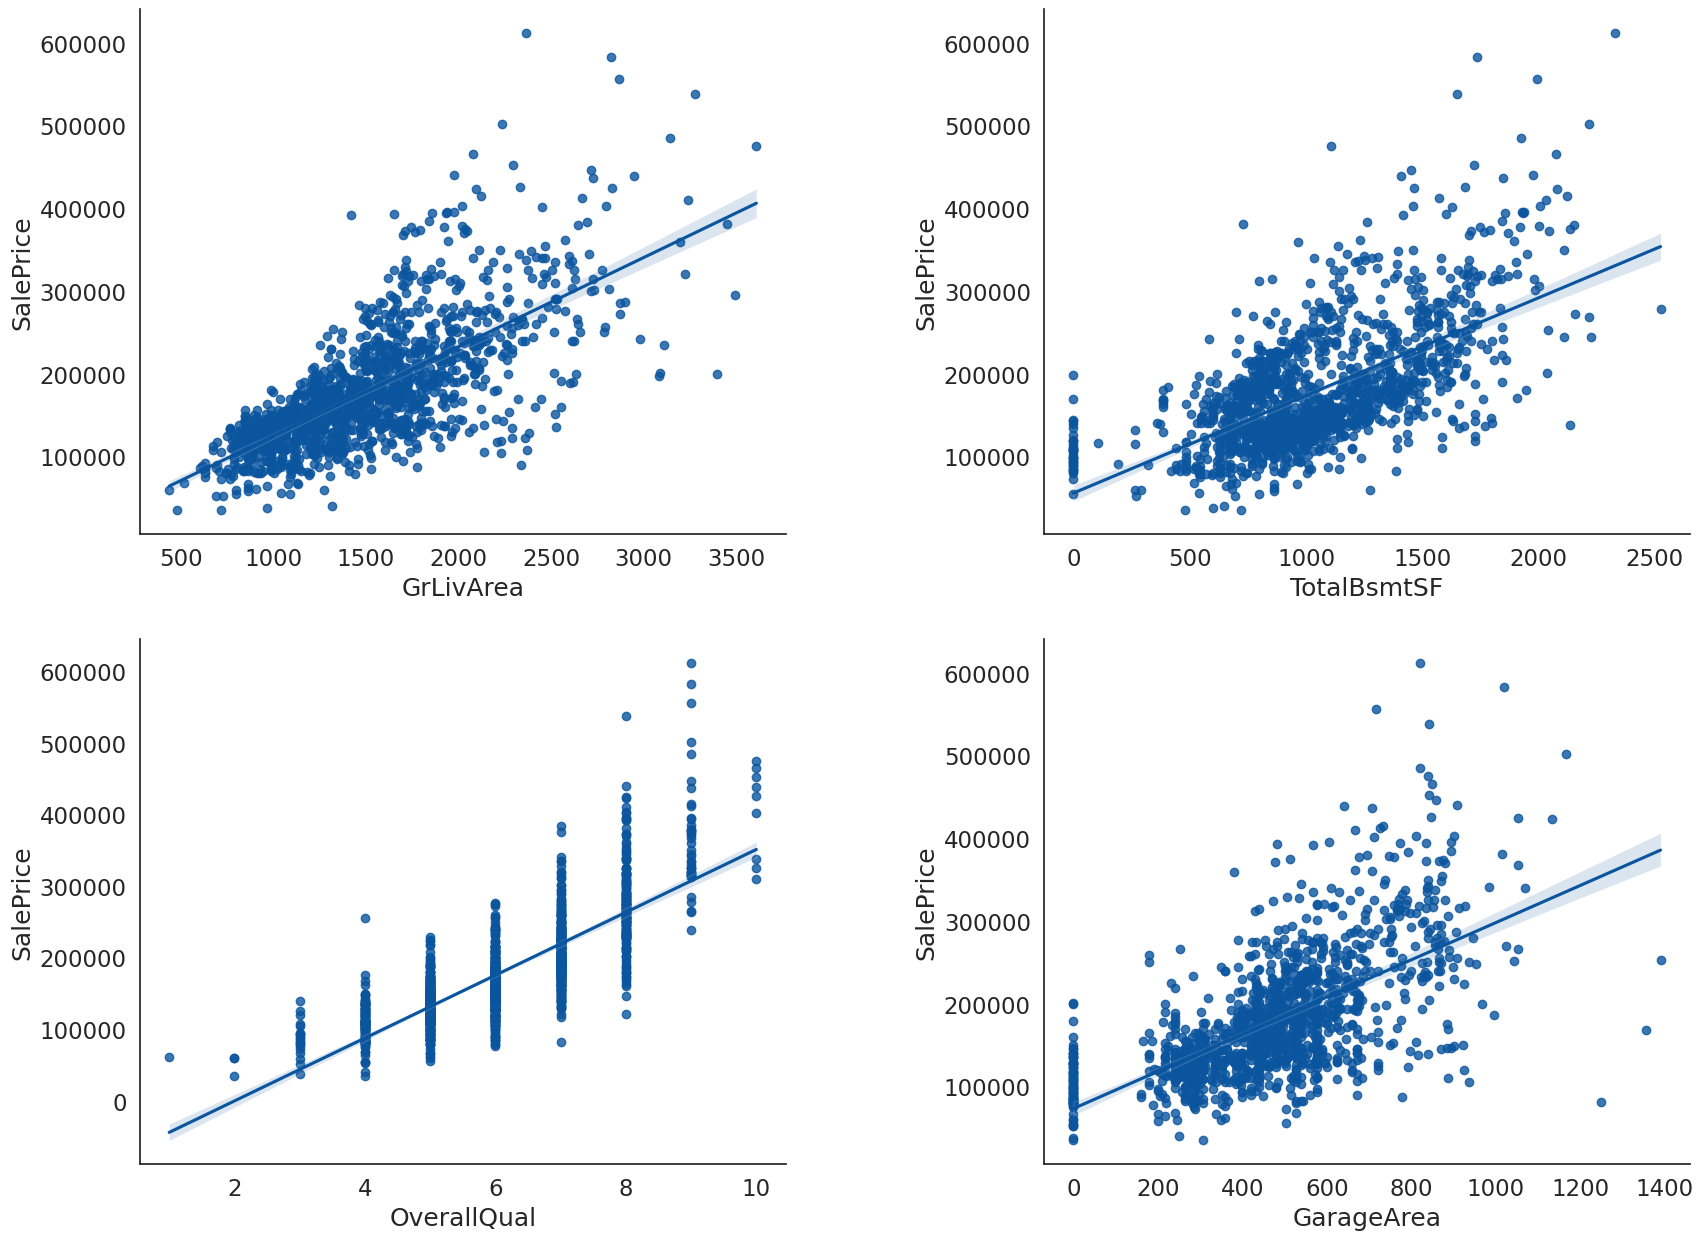

In [20]:
sns.set(font_scale = 1.5)
sns.set_style("white")
sns.set_palette("Blues_r")
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.2,wspace=0.4)
plt.subplot(2,2,1)
sns.regplot(data=house_df, x='GrLivArea',y='SalePrice')
plt.subplot(2,2,2)
sns.regplot(data=house_df, x='TotalBsmtSF',y='SalePrice')
plt.subplot(2,2,3)
sns.regplot(data=house_df, x='OverallQual',y='SalePrice')
plt.subplot(2,2,4)
sns.regplot(data=house_df, x='GarageArea',y='SalePrice')
sns.despine()